# DSGRN Resource Estimation

In [1]:
from DSGRN import *
import random
import timeit

def display_time(seconds):
    """
    Given an elapsed time in seconds, return a string which breaks it into
    years, weeks, days, hours, minutes, and seconds.
    
    :param seconds: number of seconds
    :type seconds: float
    """
    result = []
    intervals = (
        ('years', 31536000), 
        ('weeks', 604800),
        ('days', 86400),
        ('hours', 3600),
        ('minutes', 60),
        ('seconds', 1),
        )
    for name, count in intervals:
        value = seconds // count
        if value:
            seconds -= value * count
            if value == 1:
                name = name.rstrip('s')
            result.append("{} {}".format(value, name))
    return ', '.join(result)

def estimate_time_to_compute_all_morsegraphs(network, sampletime = None):
    """
    Compute morsegraphs for the provided network at random and estimate how long
    it would take to compute them all.
    
    .. note::
    
        If a single time-trial takes less time than ``sampletime`` (which defaults to ``.1`` seconds)
        to complete, then this function should take approximately ``sampletime`` seconds to complete.
        Otherwise, it will take as a single trial.
    
    :param network:    network to make estimates for
    :type network:     Network
    :param sampletime: amount of time to spend on time trials in seconds
    :type sampletime:  float
    """
    if not sampletime:
        sampletime = .1  # spend .1 seconds on time trials by default
    pg = ParameterGraph(network)
    N = pg.size()
    def timetrial():
        pi = random.randrange(0, N)
        p  = pg.parameter(pi)
        dg = DomainGraph(p)
        mg = MorseGraph(dg)
    seconds_elapsed = 0
    trials = 0
    n = 1
    while 2 * seconds_elapsed < sampletime:
        seconds_elapsed = seconds_elapsed + timeit.timeit(timetrial, number=n, globals=globals())
        trials = trials + n
        n = 2 * n
    average_time = seconds_elapsed/trials
    estimated_time = average_time * N
    return average_time * N

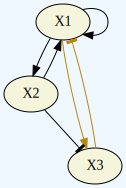

In [2]:
little_network = Network("""
X1 : (X1+X2)(~X3)
X2 : (X1)
X3 : (X1)(~X2)
""")

DrawGraph(little_network)

In [3]:
estimated_time_in_seconds = estimate_time_to_compute_all_morsegraphs(little_network)
print(display_time(estimated_time_in_seconds) + " single-threaded on current hardware.")

28.0 seconds single-threaded on current hardware.


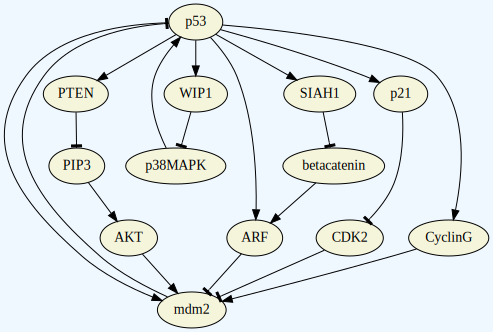

In [4]:
big_network = Network("""
p53 : p38MAPK + ~mdm2 : E
mdm2 : ~CDK2 + AKT + CyclinG + ~ARF + p53 : E
ARF : p53 + betacatenin : E
p38MAPK : ~WIP1 : E
WIP1 : p53 : E
AKT : PIP3 : E
PIP3 : ~PTEN : E
PTEN : p53 : E
CDK2 : ~p21 : E
p21 : p53 : E
betacatenin : ~SIAH1 : E
SIAH1 : p53 : E
CyclinG : p53 : E
""")

DrawGraph(big_network)

In [5]:
estimated_time_in_seconds = estimate_time_to_compute_all_morsegraphs(big_network)
print(display_time(estimated_time_in_seconds) + " single-threaded on current hardware.")

3760.0 years, 37.0 weeks, 15.0 hours, 11.0 minutes, 17.0 seconds single-threaded on current hardware.


In [6]:
# More accurate: perform ~60s of trials. 
estimated_time_in_seconds = estimate_time_to_compute_all_morsegraphs(big_network,60)
print(display_time(estimated_time_in_seconds) + " single-threaded on current hardware.")

3982.0 years, 25.0 weeks, 4.0 days, 18.0 hours, 6.0 minutes, 48.0 seconds single-threaded on current hardware.


In [7]:
# Again, to see variance between trials: 
estimated_time_in_seconds = estimate_time_to_compute_all_morsegraphs(big_network,60)
print(display_time(estimated_time_in_seconds) + " single-threaded on current hardware.")

4107.0 years, 45.0 weeks, 5.0 days, 9.0 hours, 35.0 minutes, 29.0 seconds single-threaded on current hardware.
